# Plot raw lightcurve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
lc_data_path = '/home/nmiranda/workspace/ztf_rapid/data/raw/rcf_marshallc_sncosmo_200114_2018classupdate_addedcv.pkl'

In [3]:
lc_data = pd.read_pickle(lc_data_path)

In [4]:
# this_id = list(lc_data.keys())[0]
this_id = 'ZTF19aamvmer'
this_lc = lc_data[this_id]

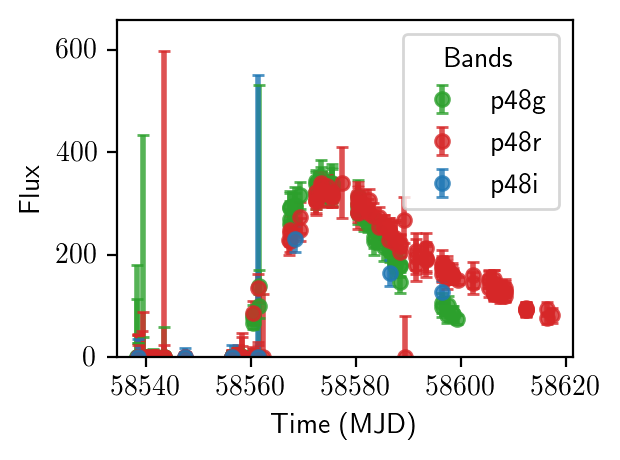

In [5]:
fig = ztf_rapid.plot_raw_lightcurve(this_lc)

In [6]:
fig.savefig('/home/nmiranda/workspace/ztf_rapid/reports/figures/ZTF19aaksrlb_raw.svg')